In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf
import folium
import warnings
warnings.filterwarnings('ignore')

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
pd.set_option('display.max_rows',None)

# Importing my dataset

In [5]:
df= pd.read_csv(r'/home/blunder-master/Downloads/archive/covid_19_data.csv')

In [6]:
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0       1.00    0.00       0.00  
1      14.00    0.00       0.00  
2       6.00    0.00       0.00  
3       1.00    0.00       0.00  
4       0.00    0.00       0.00

In [7]:
df.shape

(306429, 8)

In [8]:
df.tail()

SNo ObservationDate     Province/State  Country/Region  \
306424  306425      05/29/2021  Zaporizhia Oblast         Ukraine   
306425  306426      05/29/2021            Zeeland     Netherlands   
306426  306427      05/29/2021           Zhejiang  Mainland China   
306427  306428      05/29/2021    Zhytomyr Oblast         Ukraine   
306428  306429      05/29/2021       Zuid-Holland     Netherlands   

                Last Update  Confirmed  Deaths  Recovered  
306424  2021-05-30 04:20:55  102641.00 2335.00   95289.00  
306425  2021-05-30 04:20:55   29147.00  245.00       0.00  
306426  2021-05-30 04:20:55    1364.00    1.00    1324.00  
306427  2021-05-30 04:20:55   87550.00 1738.00   83790.00  
306428  2021-05-30 04:20:55  391559.00 4252.00       0.00

# Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [10]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [11]:
df.describe()

SNo  Confirmed    Deaths  Recovered
count 306429.00  306429.00 306429.00  306429.00
mean  153215.00   85670.91   2036.40   50420.29
std    88458.58  277551.60   6410.94  201512.45
min        1.00 -302844.00   -178.00 -854405.00
25%    76608.00    1042.00     13.00      11.00
50%   153215.00   10375.00    192.00    1751.00
75%   229822.00   50752.00   1322.00   20270.00
max   306429.00 5863138.00 112385.00 6399531.00

In [12]:
Confirmed=df.groupby('ObservationDate').sum()['Confirmed'].reset_index()

In [13]:
Confirmed

ObservationDate    Confirmed
0        01/01/2021  84092619.00
1        01/02/2021  84718978.00
2        01/03/2021  85251774.00
3        01/04/2021  85805892.00
4        01/05/2021  86546014.00
5        01/06/2021  87329386.00
6        01/07/2021  88210223.00
7        01/08/2021  89013445.00
8        01/09/2021  89774439.00
9        01/10/2021  90363573.00
10       01/11/2021  90983503.00
11       01/12/2021  91689011.00
12       01/13/2021  92437399.00
13       01/14/2021  93192627.00
14       01/15/2021  93959814.00
15       01/16/2021  94598958.00
16       01/17/2021  95128170.00
17       01/18/2021  95643236.00
18       01/19/2021  96251662.00
19       01/20/2021  96944599.00
20       01/21/2021  97600922.00
21       01/22/2020       557.00
22       01/22/2021  98259983.00
23       01/23/2020      1097.00
24       01/23/2021  98828107.00
25       01/24/2020       941.00
26       01/24/2021  99273761.00
27       01/25/2020      1437.00
28       01/25/2021  99771101.00
29       01/26/2020      2118.00
30       01/26/2021 100327339.00
31       01/27/2020      2927.00
32       01/27/2021 100925700.00
33       01/28/2020      5578.00
34       01/28/2021 101539951.00
35       01/29/2020      6165.00
36       01/29/2021 102130394.00
37       01/30/2020      8235.00
38       01/30/2021 102645724.00
39       01/31/2020      9925.00
40       01/31/2021 103027363.00
41       02/01/2020     12038.00
42       02/01/2021 103474137.00
43       02/02/2020     16787.00
44       02/02/2021 103932094.00
45       02/03/2020     19881.00
46       02/03/2021 104454075.00
47       02/04/2020     23892.00
48       02/04/2021 104920982.00
49       02/05/2020     27636.00
50       02/05/2021 105456410.00
51       02/06/2020     30818.00
52       02/06/2021 105828535.00
53       02/07/2020     34392.00
54       02/07/2021 106226613.00
55       02/08/2020     37121.00
56       02/08/2021 106542506.00
57       02/09/2020     40151.00
58       02/09/2021 106970539.00
59       02/10/2020     42763.00
60       02/10/2021 107406280.00
61       02/11/2020     44803.00
62       02/11/2021 107847745.00
63       02/12/2020     45222.00
64       02/12/2021 108276434.00
65       02/13/2020     60370.00
66       02/13/2021 108649735.00
67       02/14/2020     66887.00
68       02/14/2021 108943585.00
69       02/15/2020     69033.00
70       02/15/2021 109226751.00
71       02/16/2020     71226.00
72       02/16/2021 109577771.00
73       02/17/2020     73260.00
74       02/17/2021 109973326.00
75       02/18/2020     75138.00
76       02/18/2021 110376842.00
77       02/19/2020     75641.00
78       02/19/2021 110789361.00
79       02/20/2020     76199.00
80       02/20/2021 111159816.00
81       02/21/2020     76843.00
82       02/21/2021 111474262.00
83       02/22/2020     78599.00
84       02/22/2021 111762700.00
85       02/23/2020     78985.00
86       02/23/2021 112151553.00
87       02/24/2020     79570.00
88       02/24/2021 112596489.00
89       02/25/2020     80415.00
90       02/25/2021 113043967.00
91       02/26/2020     81397.00
92       02/26/2021 113487006.00
93       02/27/2020     82756.00
94       02/27/2021 113876236.00
95       02/28/2020     84125.00
96       02/28/2021 114179745.00
97       02/29/2020     86012.00
98       03/01/2020     88368.00
99       03/01/2021 114485609.00
100      03/02/2020     90311.00
101      03/02/2021 114795897.00
102      03/03/2020     92856.00
103      03/03/2021 115237039.00
104      03/04/2020     95127.00
105      03/04/2021 115690088.00
106      03/05/2020     97936.00
107      03/05/2021 116137142.00
108      03/06/2020    101763.00
109      03/06/2021 116547675.00
110      03/07/2020    105832.00
111      03/07/2021 116915987.00
112      03/08/2020    109820.00
113      03/08/2021 117214710.00
114      03/09/2020    113776.00
115      03/09/2021 117629375.00
116      03/10/2020    118587.00
117      03/10/2021 118096454.00
118      03/11/2020    125850.00
119      03/11/2021 118573350.00
120      03

In [14]:
Deaths=df.groupby('ObservationDate').sum()['Deaths'].reset_index()

In [15]:
Deaths

ObservationDate     Deaths
0        01/01/2021 1834675.00
1        01/02/2021 1843108.00
2        01/03/2021 1850449.00
3        01/04/2021 1860598.00
4        01/05/2021 1875953.00
5        01/06/2021 1891006.00
6        01/07/2021 1905926.00
7        01/08/2021 1921092.00
8        01/09/2021 1933877.00
9        01/10/2021 1942225.00
10       01/11/2021 1952549.00
11       01/12/2021 1969887.00
12       01/13/2021 1986359.00
13       01/14/2021 2001730.00
14       01/15/2021 2016841.00
15       01/16/2021 2030089.00
16       01/17/2021 2038753.00
17       01/18/2021 2048179.00
18       01/19/2021 2065030.00
19       01/20/2021 2082668.00
20       01/21/2021 2099457.00
21       01/22/2020      17.00
22       01/22/2021 2115478.00
23       01/23/2020      34.00
24       01/23/2021 2128772.00
25       01/24/2020      26.00
26       01/24/2021 2137740.00
27       01/25/2020      42.00
28       01/25/2021 2148508.00
29       01/26/2020      56.00
30       01/26/2021 2165816.00
31       01/27/2020      82.00
32       01/27/2021 2182496.00
33       01/28/2020     131.00
34       01/28/2021 2199547.00
35       01/29/2020     133.00
36       01/29/2021 2214494.00
37       01/30/2020     171.00
38       01/30/2021 2228080.00
39       01/31/2020     213.00
40       01/31/2021 2236070.00
41       02/01/2020     259.00
42       02/01/2021 2246288.00
43       02/02/2020     362.00
44       02/02/2021 2261124.00
45       02/03/2020     426.00
46       02/03/2021 2276852.00
47       02/04/2020     492.00
48       02/04/2021 2289386.00
49       02/05/2020     564.00
50       02/05/2021 2305957.00
51       02/06/2020     634.00
52       02/06/2021 2316094.00
53       02/07/2020     719.00
54       02/07/2021 2324080.00
55       02/08/2020     806.00
56       02/08/2021 2332412.00
57       02/09/2020     906.00
58       02/09/2021 2347949.00
59       02/10/2020    1013.00
60       02/10/2021 2361352.00
61       02/11/2020    1113.00
62       02/11/2021 2374826.00
63       02/12/2020    1118.00
64       02/12/2021 2387299.00
65       02/13/2020    1371.00
66       02/13/2021 2397104.00
67       02/14/2020    1523.00
68       02/14/2021 2403466.00
69       02/15/2020    1666.00
70       02/15/2021 2410360.00
71       02/16/2020    1770.00
72       02/16/2021 2421278.00
73       02/17/2020    1868.00
74       02/17/2021 2432617.00
75       02/18/2020    2007.00
76       02/18/2021 2443987.00
77       02/19/2020    2122.00
78       02/19/2021 2455035.00
79       02/20/2020    2247.00
80       02/20/2021 2463547.00
81       02/21/2020    2251.00
82       02/21/2021 2469427.00
83       02/22/2020    2458.00
84       02/22/2021 2476376.00
85       02/23/2020    2469.00
86       02/23/2021 2487556.00
87       02/24/2020    2629.00
88       02/24/2021 2499559.00
89       02/25/2020    2708.00
90       02/25/2021 2509724.00
91       02/26/2020    2770.00
92       02/26/2021 2519974.00
93       02/27/2020    2814.00
94       02/27/2021 2528114.00
95       02/28/2020    2872.00
96       02/28/2021 2533548.00
97       02/29/2020    2941.00
98       03/01/2020    2996.00
99       03/01/2021 2540757.00
100      03/02/2020    3085.00
101      03/02/2021 2551191.00
102      03/03/2020    3160.00
103      03/03/2021 2562264.00
104      03/04/2020    3254.00
105      03/04/2021 2572042.00
106      03/05/2020    3349.00
107      03/05/2021 2582059.00
108      03/06/2020    3460.00
109      03/06/2021 2589891.00
110      03/07/2020    3563.00
111      03/07/2021 2595165.00
112      03/08/2020    3803.00
113      03/08/2021 2602025.00
114      03/09/2020    4002.00
115      03/09/2021 2612006.00
116      03/10/2020    4262.00
117      03/10/2021 2621697.00
118      03/11/2020    4615.00
119      03/11/2021 2631464.00
120      03/12/2020    4720.00
121      03/12/2021 2641092.00
122      03/13/2020    5404.00
123      03/13/2021 2649078.00
124      03/14/2020    5819.00
125      03/14/2021 2654577.00
126      03/15/2020    6440.00
127      03/15/2021 2661398.00
128  

In [16]:
Recovered=df.groupby('ObservationDate').sum()['Recovered'].reset_index()

In [17]:
Recovered

ObservationDate    Recovered
0        01/01/2021  47313005.00
1        01/02/2021  47614297.00
2        01/03/2021  47882779.00
3        01/04/2021  48173187.00
4        01/05/2021  48488548.00
5        01/06/2021  48801673.00
6        01/07/2021  49125604.00
7        01/08/2021  49422867.00
8        01/09/2021  49753112.00
9        01/10/2021  50023662.00
10       01/11/2021  50313950.00
11       01/12/2021  50657507.00
12       01/13/2021  51023568.00
13       01/14/2021  51396413.00
14       01/15/2021  51717035.00
15       01/16/2021  52034090.00
16       01/17/2021  52349805.00
17       01/18/2021  52668558.00
18       01/19/2021  53071502.00
19       01/20/2021  53399273.00
20       01/21/2021  53765412.00
21       01/22/2020        30.00
22       01/22/2021  54147169.00
23       01/23/2020        60.00
24       01/23/2021  54463662.00
25       01/24/2020        39.00
26       01/24/2021  54774619.00
27       01/25/2020        42.00
28       01/25/2021  55089060.00
29       01/26/2020        56.00
30       01/26/2021  55418603.00
31       01/27/2020        65.00
32       01/27/2021  55759372.00
33       01/28/2020       108.00
34       01/28/2021  56075031.00
35       01/29/2020       127.00
36       01/29/2021  56439138.00
37       01/30/2020       145.00
38       01/30/2021  56790304.00
39       01/31/2020       225.00
40       01/31/2021  57079203.00
41       02/01/2020       287.00
42       02/01/2021  57351845.00
43       02/02/2020       476.00
44       02/02/2021  57702035.00
45       02/03/2020       627.00
46       02/03/2021  58031882.00
47       02/04/2020       857.00
48       02/04/2021  58325871.00
49       02/05/2020      1129.00
50       02/05/2021  58607158.00
51       02/06/2020      1492.00
52       02/06/2021  58901715.00
53       02/07/2020      2016.00
54       02/07/2021  59179150.00
55       02/08/2020      2616.00
56       02/08/2021  59411984.00
57       02/09/2020      3245.00
58       02/09/2021  59783592.00
59       02/10/2020      3947.00
60       02/10/2021  60052900.00
61       02/11/2020      4684.00
62       02/11/2021  60328985.00
63       02/12/2020      5151.00
64       02/12/2021  60616584.00
65       02/13/2020      6294.00
66       02/13/2021  60862827.00
67       02/14/2020      8057.00
68       02/14/2021  61058258.00
69       02/15/2020      9396.00
70       02/15/2021  61346871.00
71       02/16/2020     10866.00
72       02/16/2021  61582276.00
73       02/17/2020     12583.00
74       02/17/2021  61876217.00
75       02/18/2020     14352.00
76       02/18/2021  62112835.00
77       02/19/2020     16121.00
78       02/19/2021  62347471.00
79       02/20/2020     18179.00
80       02/20/2021  62616687.00
81       02/21/2020     18892.00
82       02/21/2021  62833944.00
83       02/22/2020     22889.00
84       02/22/2021  63016514.00
85       02/23/2020     23394.00
86       02/23/2021  63295144.00
87       02/24/2020     25227.00
88       02/24/2021  63504603.00
89       02/25/2020     27905.00
90       02/25/2021  63732295.00
91       02/26/2020     30386.00
92       02/26/2021  63992563.00
93       02/27/2020     33278.00
94       02/27/2021  64243285.00
95       02/28/2020     36710.00
96       02/28/2021  64418462.00
97       02/29/2020     39781.00
98       03/01/2020     42717.00
99       03/01/2021  64633388.00
100      03/02/2020     45601.00
101      03/02/2021  64903492.00
102      03/03/2020     48228.00
103      03/03/2021  65132900.00
104      03/04/2020     51170.00
105      03/04/2021  65383180.00
106      03/05/2020     53796.00
107      03/05/2021  65609540.00
108      03/06/2020     55864.00
109      03/06/2021  65846043.00
110      03/07/2020     58357.00
111      03/07/2021  66084363.00
112      03/08/2020     60695.00
113      03/08/2021  66358921.00
114      03/09/2020     62512.00
115      03/09/2021  66621154.00
116      03/10/2020     64400.00
117      03/10/2021  66856510.00
118      03/11/2020     66999.00
119      03/11/2021  67129127.00
120      03

# Plotted through Pandas below

<AxesSubplot:xlabel='ObservationDate'>

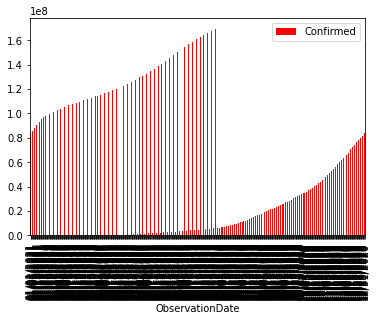

In [18]:
Confirmed.plot(kind='bar',x='ObservationDate',y='Confirmed',color='red')

# Plotted with Seaborn below

<AxesSubplot:xlabel='ObservationDate', ylabel='Confirmed'>

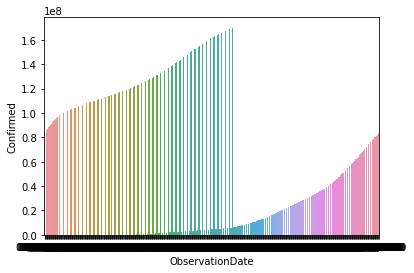

In [19]:
sns.barplot(x=Confirmed['ObservationDate'],y=Confirmed['Confirmed'])

# Plotted through Matplotlib below

<BarContainer object of 494 artists>

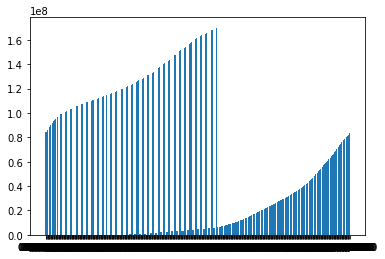

In [20]:
plt.bar(x=Confirmed['ObservationDate'],height=Confirmed['Confirmed'])

# Plotted through Plotly below for number of Confirmed Cases

In [21]:
Confirmed.iplot(kind='bar',x='ObservationDate',y='Confirmed')

# PLotted through Plotly below for  Number of Deaths

In [22]:
Deaths.iplot(kind='bar',x='ObservationDate',y='Deaths',color='red')

# PLotted through Plotly below for  Number of Recovred Cases

In [23]:
Recovered.iplot(kind='bar',x='ObservationDate',y='Recovered',color='green')

# Prediction

In [24]:
from prophet import Prophet

In [25]:
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0       1.00    0.00       0.00  
1      14.00    0.00       0.00  
2       6.00    0.00       0.00  
3       1.00    0.00       0.00  
4       0.00    0.00       0.00

In [26]:
Confirmed.head()

ObservationDate   Confirmed
0      01/01/2021 84092619.00
1      01/02/2021 84718978.00
2      01/03/2021 85251774.00
3      01/04/2021 85805892.00
4      01/05/2021 86546014.00

In [27]:
Deaths.head()

ObservationDate     Deaths
0      01/01/2021 1834675.00
1      01/02/2021 1843108.00
2      01/03/2021 1850449.00
3      01/04/2021 1860598.00
4      01/05/2021 1875953.00

In [28]:
Recovered.head()

ObservationDate   Recovered
0      01/01/2021 47313005.00
1      01/02/2021 47614297.00
2      01/03/2021 47882779.00
3      01/04/2021 48173187.00
4      01/05/2021 48488548.00

In [29]:
Confirmed.tail()

ObservationDate   Confirmed
489      12/27/2020 80912611.00
490      12/28/2020 81408934.00
491      12/29/2020 82073362.00
492      12/30/2020 82834592.00
493      12/31/2020 83559601.00

In [30]:
Confirmed.head()

ObservationDate   Confirmed
0      01/01/2021 84092619.00
1      01/02/2021 84718978.00
2      01/03/2021 85251774.00
3      01/04/2021 85805892.00
4      01/05/2021 86546014.00

In [31]:
Deaths.tail()

ObservationDate     Deaths
489      12/27/2020 1771659.00
490      12/28/2020 1781415.00
491      12/29/2020 1796786.00
492      12/30/2020 1811843.00
493      12/31/2020 1825012.00

In [32]:
Recovered.tail()

ObservationDate   Recovered
489      12/27/2020 45717710.00
490      12/28/2020 46016136.00
491      12/29/2020 46369231.00
492      12/30/2020 46757476.00
493      12/31/2020 47032627.00

In [33]:
# Date=ds(datestamp, column= y)
# prophet takes dates in yyyy-mm-dd and hh:mm:ss
# so converting in first

# Prediction for Confirmed Cases Worldwide

In [34]:
Confirmed.columns=['ds','y']
Confirmed['ds']=pd.to_datetime(Confirmed['ds'])
Confirmed

ds            y
0   2021-01-01  84092619.00
1   2021-01-02  84718978.00
2   2021-01-03  85251774.00
3   2021-01-04  85805892.00
4   2021-01-05  86546014.00
5   2021-01-06  87329386.00
6   2021-01-07  88210223.00
7   2021-01-08  89013445.00
8   2021-01-09  89774439.00
9   2021-01-10  90363573.00
10  2021-01-11  90983503.00
11  2021-01-12  91689011.00
12  2021-01-13  92437399.00
13  2021-01-14  93192627.00
14  2021-01-15  93959814.00
15  2021-01-16  94598958.00
16  2021-01-17  95128170.00
17  2021-01-18  95643236.00
18  2021-01-19  96251662.00
19  2021-01-20  96944599.00
20  2021-01-21  97600922.00
21  2020-01-22       557.00
22  2021-01-22  98259983.00
23  2020-01-23      1097.00
24  2021-01-23  98828107.00
25  2020-01-24       941.00
26  2021-01-24  99273761.00
27  2020-01-25      1437.00
28  2021-01-25  99771101.00
29  2020-01-26      2118.00
30  2021-01-26 100327339.00
31  2020-01-27      2927.00
32  2021-01-27 100925700.00
33  2020-01-28      5578.00
34  2021-01-28 101539951.00
35  2020-01-29      6165.00
36  2021-01-29 102130394.00
37  2020-01-30      8235.00
38  2021-01-30 102645724.00
39  2020-01-31      9925.00
40  2021-01-31 103027363.00
41  2020-02-01     12038.00
42  2021-02-01 103474137.00
43  2020-02-02     16787.00
44  2021-02-02 103932094.00
45  2020-02-03     19881.00
46  2021-02-03 104454075.00
47  2020-02-04     23892.00
48  2021-02-04 104920982.00
49  2020-02-05     27636.00
50  2021-02-05 105456410.00
51  2020-02-06     30818.00
52  2021-02-06 105828535.00
53  2020-02-07     34392.00
54  2021-02-07 106226613.00
55  2020-02-08     37121.00
56  2021-02-08 106542506.00
57  2020-02-09     40151.00
58  2021-02-09 106970539.00
59  2020-02-10     42763.00
60  2021-02-10 107406280.00
61  2020-02-11     44803.00
62  2021-02-11 107847745.00
63  2020-02-12     45222.00
64  2021-02-12 108276434.00
65  2020-02-13     60370.00
66  2021-02-13 108649735.00
67  2020-02-14     66887.00
68  2021-02-14 108943585.00
69  2020-02-15     69033.00
70  2021-02-15 109226751.00
71  2020-02-16     71226.00
72  2021-02-16 109577771.00
73  2020-02-17     73260.00
74  2021-02-17 109973326.00
75  2020-02-18     75138.00
76  2021-02-18 110376842.00
77  2020-02-19     75641.00
78  2021-02-19 110789361.00
79  2020-02-20     76199.00
80  2021-02-20 111159816.00
81  2020-02-21     76843.00
82  2021-02-21 111474262.00
83  2020-02-22     78599.00
84  2021-02-22 111762700.00
85  2020-02-23     78985.00
86  2021-02-23 112151553.00
87  2020-02-24     79570.00
88  2021-02-24 112596489.00
89  2020-02-25     80415.00
90  2021-02-25 113043967.00
91  2020-02-26     81397.00
92  2021-02-26 113487006.00
93  2020-02-27     82756.00
94  2021-02-27 113876236.00
95  2020-02-28     84125.00
96  2021-02-28 114179745.00
97  2020-02-29     86012.00
98  2020-03-01     88368.00
99  2021-03-01 114485609.00
100 2020-03-02     90311.00
101 2021-03-02 114795897.00
102 2020-03-03     92856.00
103 2021-03-03 115237039.00
104 2020-03-04     95127.00
105 2021-03-04 115690088.00
106 2020-03-05     97936.00
107 2021-03-05 116137142.00
108 2020-03-06    101763.00
109 2021-03-06 116547675.00
110 2020-03-07    105832.00
111 2021-03-07 116915987.00
112 2020-03-08    109820.00
113 2021-03-08 117214710.00
114 2020-03-09    113776.00
115 2021-03-09 117629375.00
116 2020-03-10    118587.00
117 2021-03-10 118096454.00
118 2020-03-11    125850.00
119 2021-03-11 118573350.00
120 2020-03-12    128329.00
121 2021-03-12 119062678.00
122 2020-03-13    145182.00
123 2021-03-13 119516794.00
124 2020-03-14    156084.00
125 2021-03-14 119877179.00
126 2020-03-15    167408.00
127 2021-03-15 120226080.00
128 2020-03-16    181571.00
129 2021-03-16 120699093.00
130 2020-03-17    197205.00
131 2021-03-17 121238378.00
132 2020-03-18    214983.00
133 2021-03-18 121792101.00
134 2020-03-19    242674.00
135 2021-03-19 122353780.00
136 2020-03-20    272268.00
137 2021-03-20 122852600.00
138 2020-03-21    304672.00
139 2021-03-21 123275915.00
140 2020-03-22    337867.00
141 2021-03-22 123692736.00
142 2020

In [35]:
predictModel=Prophet(interval_width=0.96)
predictModel.fit(Confirmed)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future=predictModel.make_future_dataframe(periods=300)
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
5   2020-01-27
6   2020-01-28
7   2020-01-29
8   2020-01-30
9   2020-01-31
10  2020-02-01
11  2020-02-02
12  2020-02-03
13  2020-02-04
14  2020-02-05
15  2020-02-06
16  2020-02-07
17  2020-02-08
18  2020-02-09
19  2020-02-10
20  2020-02-11
21  2020-02-12
22  2020-02-13
23  2020-02-14
24  2020-02-15
25  2020-02-16
26  2020-02-17
27  2020-02-18
28  2020-02-19
29  2020-02-20
30  2020-02-21
31  2020-02-22
32  2020-02-23
33  2020-02-24
34  2020-02-25
35  2020-02-26
36  2020-02-27
37  2020-02-28
38  2020-02-29
39  2020-03-01
40  2020-03-02
41  2020-03-03
42  2020-03-04
43  2020-03-05
44  2020-03-06
45  2020-03-07
46  2020-03-08
47  2020-03-09
48  2020-03-10
49  2020-03-11
50  2020-03-12
51  2020-03-13
52  2020-03-14
53  2020-03-15
54  2020-03-16
55  2020-03-17
56  2020-03-18
57  2020-03-19
58  2020-03-20
59  2020-03-21
60  2020-03-22
61  2020-03-23
62  2020-03-24
63  2020-03-25
64  2020-03-26
65  2020-03-27
66  2020-03-28
67  2020-03-29
68  2020-03-30
69  2020-03-31
70  2020-04-01
71  2020-04-02
72  2020-04-03
73  2020-04-04
74  2020-04-05
75  2020-04-06
76  2020-04-07
77  2020-04-08
78  2020-04-09
79  2020-04-10
80  2020-04-11
81  2020-04-12
82  2020-04-13
83  2020-04-14
84  2020-04-15
85  2020-04-16
86  2020-04-17
87  2020-04-18
88  2020-04-19
89  2020-04-20
90  2020-04-21
91  2020-04-22
92  2020-04-23
93  2020-04-24
94  2020-04-25
95  2020-04-26
96  2020-04-27
97  2020-04-28
98  2020-04-29
99  2020-04-30
100 2020-05-01
101 2020-05-02
102 2020-05-03
103 2020-05-04
104 2020-05-05
105 2020-05-06
106 2020-05-07
107 2020-05-08
108 2020-05-09
109 2020-05-10
110 2020-05-11
111 2020-05-12
112 2020-05-13
113 2020-05-14
114 2020-05-15
115 2020-05-16
116 2020-05-17
117 2020-05-18
118 2020-05-19
119 2020-05-20
120 2020-05-21
121 2020-05-22
122 2020-05-23
123 2020-05-24
124 2020-05-25
125 2020-05-26
126 2020-05-27
127 2020-05-28
128 2020-05-29
129 2020-05-30
130 2020-05-31
131 2020-06-01
132 2020-06-02
133 2020-06-03
134 2020-06-04
135 2020-06-05
136 2020-06-06
137 2020-06-07
138 2020-06-08
139 2020-06-09
140 2020-06-10
141 2020-06-11
142 2020-06-12
143 2020-06-13
144 2020-06-14
145 2020-06-15
146 2020-06-16
147 2020-06-17
148 2020-06-18
149 2020-06-19
150 2020-06-20
151 2020-06-21
152 2020-06-22
153 2020-06-23
154 2020-06-24
155 2020-06-25
156 2020-06-26
157 2020-06-27
158 2020-06-28
159 2020-06-29
160 2020-06-30
161 2020-07-01
162 2020-07-02
163 2020-07-03
164 2020-07-04
165 2020-07-05
166 2020-07-06
167 2020-07-07
168 2020-07-08
169 2020-07-09
170 2020-07-10
171 2020-07-11
172 2020-07-12
173 2020-07-13
174 2020-07-14
175 2020-07-15
176 2020-07-16
177 2020-07-17
178 2020-07-18
179 2020-07-19
180 2020-07-20
181 2020-07-21
182 2020-07-22
183 2020-07-23
184 2020-07-24
185 2020-07-25
186 2020-07-26
187 2020-07-27
188 2020-07-28
189 2020-07-29
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03
195 2020-08-04
196 2020-08-05
197 2020-08-06
198 2020-08-07
199 2020-08-08
200 2020-08-09
201 2020-08-10
202 2020-08-11
203 2020-08-12
204 2020-08-13
205 2020-08-14
206 2020-08-15
207 2020-08-16
208 2020-08-17
209 2020-08-18
210 2020-08-19
211 2020-08-20
212 2020-08-21
213 2020-08-22
214 2020-08-23
215 2020-08-24
216 2020-08-25
217 2020-08-26
218 2020-08-27
219 2020-08-28
220 2020-08-29
221 2020-08-30
222 2020-08-31
223 2020-09-01
224 2020-09-02
225 2020-09-03
226 2020-09-04
227 2020-09-05
228 2020-09-06
229 2020-09-07
230 2020-09-08
231 2020-09-09
232 2020-09-10
233 2020-09-11
234 2020-09-12
235 2020-09-13
236 2020-09-14
237 2020-09-15
238 2020-09-16
239 2020-09-17
240 2020-09-18
241 2020-09-19
242 2020-09-20
243 2020-09-21
244 2020-09-22
245 2020-09-23
246 2020-09-24
247 2020-09-25
248 2020-09-26
249 2020-09-27
250 2020-09-28
251 2020-09-29
252 2020-09-30
253 2020-10-01
254 2020-10-02
255 2020-10-03
256 2020-10-04
257 2020-10-05
258 2020-10-06
259 2020-10-07
260 2020-10-08
261 2020-10-09
262 2020-10-10
263 2020-10-11
264 2020-10-12
265 2020-10-13
266 202

In [37]:
future.tail(30)

ds
764 2022-02-24
765 2022-02-25
766 2022-02-26
767 2022-02-27
768 2022-02-28
769 2022-03-01
770 2022-03-02
771 2022-03-03
772 2022-03-04
773 2022-03-05
774 2022-03-06
775 2022-03-07
776 2022-03-08
777 2022-03-09
778 2022-03-10
779 2022-03-11
780 2022-03-12
781 2022-03-13
782 2022-03-14
783 2022-03-15
784 2022-03-16
785 2022-03-17
786 2022-03-18
787 2022-03-19
788 2022-03-20
789 2022-03-21
790 2022-03-22
791 2022-03-23
792 2022-03-24
793 2022-03-25

In [38]:
forecastConfirm=predictModel.predict(future)

In [39]:
forecastConfirm

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2020-01-22   -127122.23  -2257812.43   2010924.00   -127122.23   
1   2020-01-23   -120120.85  -2120590.85   2013784.61   -120120.85   
2   2020-01-24   -113119.48  -2169049.17   2013847.13   -113119.48   
3   2020-01-25   -106118.10  -2136709.64   2177599.04   -106118.10   
4   2020-01-26    -99116.73  -2208072.20   2010171.50    -99116.73   
5   2020-01-27    -92115.35  -2196039.13   1948165.53    -92115.35   
6   2020-01-28    -85113.97  -2367290.16   2030169.49    -85113.97   
7   2020-01-29    -78112.60  -2098505.14   1974124.46    -78112.60   
8   2020-01-30    -71111.22  -2256723.88   1966922.53    -71111.22   
9   2020-01-31    -64109.85  -2197500.52   2060124.36    -64109.85   
10  2020-02-01    -57108.47  -2111349.07   2039550.79    -57108.47   
11  2020-02-02    -50107.09  -2024831.83   2031935.41    -50107.09   
12  2020-02-03    -43105.72  -2187355.31   1912354.56    -43105.72   
13  2020-02-04    -36104.34  -2185736.46   2006557.75    -36104.34   
14  2020-02-05    -29102.97  -2256580.47   2072789.06    -29102.97   
15  2020-02-06    -22101.59  -2237425.21   2192639.40    -22101.59   
16  2020-02-07    -15100.22  -2130102.50   2363256.42    -15100.22   
17  2020-02-08     -8098.86  -2141866.08   2238088.44     -8098.86   
18  2020-02-09     -1097.51  -2032621.53   2213238.40     -1097.51   
19  2020-02-10      5903.84  -2239090.41   2196076.92      5903.84   
20  2020-02-11     12905.19  -2176742.45   1919934.18     12905.19   
21  2020-02-12     19906.54  -2063511.39   2193535.95     19906.54   
22  2020-02-13     26907.90  -2014315.04   2103166.71     26907.90   
23  2020-02-14     33909.25  -2074260.57   2340952.16     33909.25   
24  2020-02-15     40910.60  -2001575.64   2152306.51     40910.60   
25  2020-02-16     47911.95  -2029366.63   2314278.04     47911.95   
26  2020-02-17     54913.30  -2084298.98   2021181.47     54913.30   
27  2020-02-18     61914.66  -2079933.20   2055346.00     61914.66   
28  2020-02-19     68916.01  -2116080.79   2045275.22     68916.01   
29  2020-02-20     75917.36  -2041439.77   2189912.63     75917.36   
30  2020-02-21     82918.71  -1995851.38   2232581.51     82918.71   
31  2020-02-22     89920.06  -1996141.01   2140043.79     89920.06   
32  2020-02-23     96921.41  -2131203.22   2232184.67     96921.41   
33  2020-02-24    103929.78  -2040565.59   2066341.13    103929.78   
34  2020-02-25    110938.14  -1971328.07   2069578.95    110938.14   
35  2020-02-26    117946.51  -1909055.70   2272762.99    117946.51   
36  2020-02-27    124954.87  -2032742.33   2235934.49    124954.87   
37  2020-02-28    131963.24  -1848658.93   2230999.50    131963.24   
38  2020-02-29    138971.60  -1845362.95   2211096.73    138971.60   
39  2020-03-01    145979.97  -2076445.62   2213893.55    145979.97   
40  2020-03-02    152988.33  -1938799.94   2172671.08    152988.33   
41  2020-03-03    159996.70  -2048426.20   2297428.69    159996.70   
42  2020-03-04    167005.06  -1997031.13   2297108.65    167005.06   
43  2020-03-05    174013.43  -1964581.54   2317078.60    174013.43   
44  2020-03-06    181021.79  -1893088.53   2430304.02    181021.79   
45  2020-03-07    188030.16  -1807161.67   2589233.33    188030.16   
46  2020-03-08    195038.52  -2090038.82   2167350.83    195038.52   
47  2020-03-09    202046.89  -1885832.24   2193955.62    202046.89   
48  2020-03-10    215001.12  -1976215.40   2130197.21    215001.12   
49  2020-03-11    227955.35  -1829809.36   2243019.98    227955.35   
50  2020-03-12    240909.58  -1704974.02   2306235.85    240909.58   
51  2020-03-13    253863.81  -1833843.29   2393779.78    253863.81   
52  2020-03-14    266818.04  -1715857.02   2374312.16    266818.04   
53  2020-03-15    279772.27  -1848822.08   2589416.29    279772.27   
54  2020-03-16    292726.50  -1778827.03   2418147.83    292726.50   
55  2020-03-17    305680.73  -1844142.73   2200206.60    305680.73   
56  2020-03-18    3186

In [40]:
forecastConfirm[['ds','yhat','yhat_lower','yhat_upper']]

ds         yhat   yhat_lower   yhat_upper
0   2020-01-22   -150394.94  -2257812.43   2010924.00
1   2020-01-23    -94622.29  -2120590.85   2013784.61
2   2020-01-24    -48896.28  -2169049.17   2013847.13
3   2020-01-25    -47234.01  -2136709.64   2177599.04
4   2020-01-26   -105242.39  -2208072.20   2010171.50
5   2020-01-27   -151644.16  -2196039.13   1948165.53
6   2020-01-28   -144792.62  -2367290.16   2030169.49
7   2020-01-29   -101385.31  -2098505.14   1974124.46
8   2020-01-30    -45612.66  -2256723.88   1966922.53
9   2020-01-31       113.35  -2197500.52   2060124.36
10  2020-02-01      1775.62  -2111349.07   2039550.79
11  2020-02-02    -56232.76  -2024831.83   2031935.41
12  2020-02-03   -102634.53  -2187355.31   1912354.56
13  2020-02-04    -95782.99  -2185736.46   2006557.75
14  2020-02-05    -52375.68  -2256580.47   2072789.06
15  2020-02-06      3396.97  -2237425.21   2192639.40
16  2020-02-07     49122.98  -2130102.50   2363256.42
17  2020-02-08     50785.22  -2141866.08   2238088.44
18  2020-02-09     -7223.18  -2032621.53   2213238.40
19  2020-02-10    -53624.97  -2239090.41   2196076.92
20  2020-02-11    -46773.46  -2176742.45   1919934.18
21  2020-02-12     -3366.17  -2063511.39   2193535.95
22  2020-02-13     52406.46  -2014315.04   2103166.71
23  2020-02-14     98132.44  -2074260.57   2340952.16
24  2020-02-15     99794.69  -2001575.64   2152306.51
25  2020-02-16     41786.28  -2029366.63   2314278.04
26  2020-02-17     -4615.51  -2084298.98   2021181.47
27  2020-02-18      2236.01  -2079933.20   2055346.00
28  2020-02-19     45643.29  -2116080.79   2045275.22
29  2020-02-20    101415.92  -2041439.77   2189912.63
30  2020-02-21    147141.91  -1995851.38   2232581.51
31  2020-02-22    148804.15  -1996141.01   2140043.79
32  2020-02-23     90795.75  -2131203.22   2232184.67
33  2020-02-24     44400.96  -2040565.59   2066341.13
34  2020-02-25     51259.49  -1971328.07   2069578.95
35  2020-02-26     94673.79  -1909055.70   2272762.99
36  2020-02-27    150453.44  -2032742.33   2235934.49
37  2020-02-28    196186.44  -1848658.93   2230999.50
38  2020-02-29    197855.69  -1845362.95   2211096.73
39  2020-03-01    139854.30  -2076445.62   2213893.55
40  2020-03-02     93459.52  -1938799.94   2172671.08
41  2020-03-03    100318.05  -2048426.20   2297428.69
42  2020-03-04    143732.35  -1997031.13   2297108.65
43  2020-03-05    199511.99  -1964581.54   2317078.60
44  2020-03-06    245244.99  -1893088.53   2430304.02
45  2020-03-07    246914.25  -1807161.67   2589233.33
46  2020-03-08    188912.86  -2090038.82   2167350.83
47  2020-03-09    142518.07  -1885832.24   2193955.62
48  2020-03-10    155322.47  -1976215.40   2130197.21
49  2020-03-11    204682.63  -1829809.36   2243019.98
50  2020-03-12    266408.14  -1704974.02   2306235.85
51  2020-03-13    318087.01  -1833843.29   2393779.78
52  2020-03-14    325702.13  -1715857.02   2374312.16
53  2020-03-15    273646.60  -1848822.08   2589416.29
54  2020-03-16    233197.69  -1778827.03   2418147.83
55  2020-03-17    246002.08  -1844142.73   2200206.60
56  2020-03-18    295362.25  -1734831.92   2530769.55
57  2020-03-19    357087.76  -1725353.77   2368799.39
58  2020-03-20    408766.62  -1567103.79   2576564.15
59  2020-03-21    416381.74  -1734845.60   2475347.26
60  2020-03-22    364326.22  -1756835.50   2638493.82
61  2020-03-23    323877.30  -1839141.60   2364262.31
62  2020-03-24    336681.70  -1831236.08   2503075.83
63  2020-03-25    386041.86  -1646698.82   2435344.89
64  2020-03-26    510743.21  -1607964.35   2710594.73
65  2020-03-27    625397.91  -1417466.79   2817037.15
66  2020-03-28    695988.87  -1283750.19   2827453.13
67  2020-03-29    706909.18  -1704101.64   2959821.58
68  2020-03-30    729436.10  -1323885.60   2885836.90
69  2020-03-31    805216.33  -1365591.72   3065202.99
70  2020-04-01    917552.33  -1240326.28   3178527.20
71  2020-04-02   1042253.68  -1076812.56   3040571.97
72  2020-04-03   1156908.38   -901963.57   3299981.55
73  2020-04-04  

In [41]:
forecastConfirm[['ds','yhat','yhat_lower','yhat_upper']].tail(300)

ds         yhat   yhat_lower   yhat_upper
494 2021-05-30 169439526.08 167443715.09 171560360.98
495 2021-05-31 170009812.52 168031657.58 172062997.19
496 2021-06-01 170633352.28 168604028.43 172706435.94
497 2021-06-02 171293447.80 169265461.94 173444975.60
498 2021-06-03 171965908.67 169774084.22 173961244.14
499 2021-06-04 172628322.89 170401104.75 174708204.84
500 2021-06-05 173246673.37 171186274.20 175414003.93
501 2021-06-06 173805353.21 171689961.59 176153465.23
502 2021-06-07 174375639.65 172226240.29 176576688.11
503 2021-06-08 174999179.40 172706612.81 177088892.94
504 2021-06-09 175659274.93 173412015.16 177883836.26
505 2021-06-10 176331735.79 173755193.80 178696763.85
506 2021-06-11 176994150.01 174673223.02 179255131.44
507 2021-06-12 177612500.49 175177038.29 179920271.80
508 2021-06-13 178171180.33 175503811.06 180480305.34
509 2021-06-14 178741466.77 176189934.77 181182819.33
510 2021-06-15 179365006.52 176636350.68 181984393.07
511 2021-06-16 180025102.05 177127942.54 182955796.00
512 2021-06-17 180697562.91 177549238.64 183523038.47
513 2021-06-18 181359977.14 178085164.42 184421671.70
514 2021-06-19 181978327.62 178768407.97 185339813.69
515 2021-06-20 182537007.45 179037333.42 186082702.90
516 2021-06-21 183107293.89 178906682.87 186674762.18
517 2021-06-22 183730833.65 179853814.93 187317137.37
518 2021-06-23 184390929.17 180256441.77 188619542.36
519 2021-06-24 185063390.04 180549298.30 189146180.79
520 2021-06-25 185725804.26 181111504.12 189961871.24
521 2021-06-26 186344154.74 181425901.05 190636048.66
522 2021-06-27 186902834.57 181923504.78 191886656.15
523 2021-06-28 187473121.01 182234591.78 192144953.91
524 2021-06-29 188096660.77 182167809.79 193087685.71
525 2021-06-30 188756756.29 183150280.13 193690570.00
526 2021-07-01 189429217.16 183584480.21 195009825.22
527 2021-07-02 190091631.38 184099450.45 196005249.30
528 2021-07-03 190709981.86 184399568.04 196887585.39
529 2021-07-04 191268661.70 184491399.12 197601621.40
530 2021-07-05 191838948.14 185037885.04 198291020.26
531 2021-07-06 192462487.89 185633826.31 199078531.83
532 2021-07-07 193122583.42 186065077.04 199558969.59
533 2021-07-08 193795044.28 186103560.09 200953349.69
534 2021-07-09 194457458.50 186466305.43 201307298.41
535 2021-07-10 195075808.98 187053437.65 202355668.44
536 2021-07-11 195634488.82 187520688.39 203100281.30
537 2021-07-12 196204775.26 187624989.10 203733380.01
538 2021-07-13 196828315.01 187722935.94 204935353.17
539 2021-07-14 197488410.54 188347938.42 206175747.87
540 2021-07-15 198160871.40 188306654.21 207231069.99
541 2021-07-16 198823285.63 189266495.13 207767337.07
542 2021-07-17 199441636.11 189528757.68 208405842.39
543 2021-07-18 200000315.94 190192911.33 209377755.57
544 2021-07-19 200570602.38 190086060.41 210458864.15
545 2021-07-20 201194142.14 190623353.36 210811754.40
546 2021-07-21 201854237.66 190990235.34 212284851.57
547 2021-07-22 202526698.53 191562736.40 213113071.68
548 2021-07-23 203189112.75 191559366.65 213953508.68
549 2021-07-24 203807463.23 191880968.44 215270041.40
550 2021-07-25 204366143.06 192170395.03 216014118.96
551 2021-07-26 204936429.50 192852179.29 217880644.22
552 2021-07-27 205559969.26 192438194.11 217892534.74
553 2021-07-28 206220064.78 192384600.82 218407581.85
554 2021-07-29 206892525.65 192980542.81 219630252.12
555 2021-07-30 207554939.87 193556403.88 220372103.34
556 2021-07-31 208173290.35 193778230.12 221165741.45
557 2021-08-01 208731970.19 194192044.03 223203243.13
558 2021-08-02 209302256.63 194545654.80 223922817.65
559 2021-08-03 209925796.38 195389281.73 223893431.57
560 2021-08-04 210585891.91 194410266.54 224555308.77
561 2021-08-05 211258352.77 195604301.61 226202628.14
562 2021-08-06 211920766.99 195390672.29 226592496.66
563 2021-08-07 212539117.47 196563190.07 227404342.96
564 2021-08-08 213097797.31 196126816.37 228923901.62
565 2021-08-09 213668083.75 197061479.00 229400052.08
566 2021-08-10 214291623.50 196915024.28 230525015.66
567 2021-08-11 2

In [42]:
forecastConfirm.iplot(kind='bar',x='ds',y='yhat',color='purple')

# Visualization for Confirmed Cases Worldwide

# Prediction for Deathtoll Worldwide

In [43]:
Deaths.columns=['ds','y']
Deaths['ds']=pd.to_datetime(Deaths['ds'])
Deaths

ds          y
0   2021-01-01 1834675.00
1   2021-01-02 1843108.00
2   2021-01-03 1850449.00
3   2021-01-04 1860598.00
4   2021-01-05 1875953.00
5   2021-01-06 1891006.00
6   2021-01-07 1905926.00
7   2021-01-08 1921092.00
8   2021-01-09 1933877.00
9   2021-01-10 1942225.00
10  2021-01-11 1952549.00
11  2021-01-12 1969887.00
12  2021-01-13 1986359.00
13  2021-01-14 2001730.00
14  2021-01-15 2016841.00
15  2021-01-16 2030089.00
16  2021-01-17 2038753.00
17  2021-01-18 2048179.00
18  2021-01-19 2065030.00
19  2021-01-20 2082668.00
20  2021-01-21 2099457.00
21  2020-01-22      17.00
22  2021-01-22 2115478.00
23  2020-01-23      34.00
24  2021-01-23 2128772.00
25  2020-01-24      26.00
26  2021-01-24 2137740.00
27  2020-01-25      42.00
28  2021-01-25 2148508.00
29  2020-01-26      56.00
30  2021-01-26 2165816.00
31  2020-01-27      82.00
32  2021-01-27 2182496.00
33  2020-01-28     131.00
34  2021-01-28 2199547.00
35  2020-01-29     133.00
36  2021-01-29 2214494.00
37  2020-01-30     171.00
38  2021-01-30 2228080.00
39  2020-01-31     213.00
40  2021-01-31 2236070.00
41  2020-02-01     259.00
42  2021-02-01 2246288.00
43  2020-02-02     362.00
44  2021-02-02 2261124.00
45  2020-02-03     426.00
46  2021-02-03 2276852.00
47  2020-02-04     492.00
48  2021-02-04 2289386.00
49  2020-02-05     564.00
50  2021-02-05 2305957.00
51  2020-02-06     634.00
52  2021-02-06 2316094.00
53  2020-02-07     719.00
54  2021-02-07 2324080.00
55  2020-02-08     806.00
56  2021-02-08 2332412.00
57  2020-02-09     906.00
58  2021-02-09 2347949.00
59  2020-02-10    1013.00
60  2021-02-10 2361352.00
61  2020-02-11    1113.00
62  2021-02-11 2374826.00
63  2020-02-12    1118.00
64  2021-02-12 2387299.00
65  2020-02-13    1371.00
66  2021-02-13 2397104.00
67  2020-02-14    1523.00
68  2021-02-14 2403466.00
69  2020-02-15    1666.00
70  2021-02-15 2410360.00
71  2020-02-16    1770.00
72  2021-02-16 2421278.00
73  2020-02-17    1868.00
74  2021-02-17 2432617.00
75  2020-02-18    2007.00
76  2021-02-18 2443987.00
77  2020-02-19    2122.00
78  2021-02-19 2455035.00
79  2020-02-20    2247.00
80  2021-02-20 2463547.00
81  2020-02-21    2251.00
82  2021-02-21 2469427.00
83  2020-02-22    2458.00
84  2021-02-22 2476376.00
85  2020-02-23    2469.00
86  2021-02-23 2487556.00
87  2020-02-24    2629.00
88  2021-02-24 2499559.00
89  2020-02-25    2708.00
90  2021-02-25 2509724.00
91  2020-02-26    2770.00
92  2021-02-26 2519974.00
93  2020-02-27    2814.00
94  2021-02-27 2528114.00
95  2020-02-28    2872.00
96  2021-02-28 2533548.00
97  2020-02-29    2941.00
98  2020-03-01    2996.00
99  2021-03-01 2540757.00
100 2020-03-02    3085.00
101 2021-03-02 2551191.00
102 2020-03-03    3160.00
103 2021-03-03 2562264.00
104 2020-03-04    3254.00
105 2021-03-04 2572042.00
106 2020-03-05    3349.00
107 2021-03-05 2582059.00
108 2020-03-06    3460.00
109 2021-03-06 2589891.00
110 2020-03-07    3563.00
111 2021-03-07 2595165.00
112 2020-03-08    3803.00
113 2021-03-08 2602025.00
114 2020-03-09    4002.00
115 2021-03-09 2612006.00
116 2020-03-10    4262.00
117 2021-03-10 2621697.00
118 2020-03-11    4615.00
119 2021-03-11 2631464.00
120 2020-03-12    4720.00
121 2021-03-12 2641092.00
122 2020-03-13    5404.00
123 2021-03-13 2649078.00
124 2020-03-14    5819.00
125 2021-03-14 2654577.00
126 2020-03-15    6440.00
127 2021-03-15 2661398.00
128 2020-03-16    7126.00
129 2021-03-16 2671288.00
130 2020-03-17    7906.00
131 2021-03-17 2681413.00
132 2020-03-18    8736.00
133 2021-03-18 2691987.00
134 2020-03-19    9869.00
135 2021-03-19 2702386.00
136 2020-03-20   11300.00
137 2021-03-20 2710432.00
138 2020-03-21   12972.00
139 2021-03-21 2716233.00
140 2020-03-22   14633.00
141 2021-03-22 2723729.00
142 2020-03-23   16527.00
143 2021-03-23 2734835.00
144 2020-03-24   18635.00
145 2021-03-24 2744557.00
146 2020-03-25   21207.00
147 2021-03-25 2755896.00
148 2020-03-26   24005.00
149 2021-03-26 2768118.00
150 2020-03-27   27230.00
151 2021-03-27 2777955.00
152 2020-03-28   30691.00
153 2021

In [44]:
predictModel=Prophet(interval_width=0.96)
predictModel.fit(Deaths)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
forecastDeaths=predictModel.predict(future)
forecastDeaths

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2020-01-22   -1058.80   -28101.97    26981.09     -1058.80     -1058.80   
1   2020-01-23    -957.97   -25394.16    25206.68      -957.97      -957.97   
2   2020-01-24    -857.13   -23938.85    26125.44      -857.13      -857.13   
3   2020-01-25    -756.30   -25450.06    26151.28      -756.30      -756.30   
4   2020-01-26    -655.46   -25772.85    22439.60      -655.46      -655.46   
5   2020-01-27    -554.63   -28401.43    22947.39      -554.63      -554.63   
6   2020-01-28    -453.80   -29942.11    25788.79      -453.80      -453.80   
7   2020-01-29    -352.96   -26873.91    26364.54      -352.96      -352.96   
8   2020-01-30    -252.13   -24682.85    25310.96      -252.13      -252.13   
9   2020-01-31    -151.29   -24291.03    28266.62      -151.29      -151.29   
10  2020-02-01     -50.46   -23633.24    28627.42       -50.46       -50.46   
11  2020-02-02      50.37   -27944.59    26113.56        50.37        50.37   
12  2020-02-03     151.21   -29093.89    23884.02       151.21       151.21   
13  2020-02-04     252.04   -28565.65    26374.10       252.04       252.04   
14  2020-02-05     352.88   -26184.72    25370.39       352.88       352.88   
15  2020-02-06     453.71   -23296.35    30141.38       453.71       453.71   
16  2020-02-07     554.54   -25130.40    30384.73       554.54       554.54   
17  2020-02-08     655.38   -25130.31    28607.82       655.38       655.38   
18  2020-02-09     756.21   -26901.15    26438.45       756.21       756.21   
19  2020-02-10     857.05   -27055.19    25690.80       857.05       857.05   
20  2020-02-11     957.88   -27411.97    25903.74       957.88       957.88   
21  2020-02-12    1058.71   -25509.48    25945.48      1058.71      1058.71   
22  2020-02-13    1159.55   -25753.19    26343.60      1159.55      1159.55   
23  2020-02-14    1260.38   -21486.41    28964.67      1260.38      1260.38   
24  2020-02-15    1361.21   -24747.01    28158.13      1361.21      1361.21   
25  2020-02-16    1462.05   -24737.31    26249.49      1462.05      1462.05   
26  2020-02-17    1562.88   -29742.84    25810.10      1562.88      1562.88   
27  2020-02-18    1663.72   -24952.87    26954.43      1663.72      1663.72   
28  2020-02-19    1764.55   -23769.39    27982.46      1764.55      1764.55   
29  2020-02-20    1865.38   -21448.51    29125.64      1865.38      1865.38   
30  2020-02-21    1966.22   -22188.19    29299.30      1966.22      1966.22   
31  2020-02-22    2067.05   -22561.29    31439.40      2067.05      2067.05   
32  2020-02-23    2167.88   -24998.45    26142.57      2167.88      2167.88   
33  2020-02-24    2268.72   -24841.43    27239.56      2268.72      2268.72   
34  2020-02-25    2369.55   -26984.40    25514.64      2369.55      2369.55   
35  2020-02-26    2470.38   -24345.83    28956.65      2470.38      2470.38   
36  2020-02-27    2571.22   -22279.25    28608.06      2571.22      2571.22   
37  2020-02-28    2672.05   -19943.62    31355.67      2672.05      2672.05   
38  2020-02-29    2772.88   -21287.53    30481.57      2772.88      2772.88   
39  2020-03-01    2873.71   -23226.08    29537.26      2873.71      2873.71   
40  2020-03-02    2974.55   -26520.15    27568.52      2974.55      2974.55   
41  2020-03-03    3075.38   -26020.05    27890.97      3075.38      3075.38   
42  2020-03-04    3176.21   -21149.76    30010.46      3176.21      3176.21   
43  2020-03-05    3277.05   -21874.22    30165.28      3277.05      3277.05   
44  2020-03-06    3377.88   -19657.05    30210.19      3377.88      3377.88   
45  2020-03-07    3478.71   -21567.42    29444.71      3478.71      3478.71   
46  2020-03-08    3579.54   -23710.34    28472.05      3579.54      3579.54   
47  2020-03-09    3680.38   -24237.08    29659.54      3680.38      3680.38   
48  2020-03-10    4401.37   -22490.10    28773.33      4401.37      4401.37   
49  2020-03-11    5122.36   -21860.69    31029.38      5122.36

In [46]:
forecastDeaths[['ds','yhat','yhat_lower','yhat_upper']]

ds       yhat  yhat_lower  yhat_upper
0   2020-01-22   -1013.81   -28101.97    26981.09
1   2020-01-23     143.04   -25394.16    25206.68
2   2020-01-24    1117.70   -23938.85    26125.44
3   2020-01-25     813.32   -25450.06    26151.28
4   2020-01-26   -1659.62   -25772.85    22439.60
5   2020-01-27   -2967.69   -28401.43    22947.39
6   2020-01-28   -1727.03   -29942.11    25788.79
7   2020-01-29    -307.97   -26873.91    26364.54
8   2020-01-30     848.88   -24682.85    25310.96
9   2020-01-31    1823.54   -24291.03    28266.62
10  2020-02-01    1519.16   -23633.24    28627.42
11  2020-02-02    -953.78   -27944.59    26113.56
12  2020-02-03   -2261.85   -29093.89    23884.02
13  2020-02-04   -1021.20   -28565.65    26374.10
14  2020-02-05     397.87   -26184.72    25370.39
15  2020-02-06    1554.72   -23296.35    30141.38
16  2020-02-07    2529.38   -25130.40    30384.73
17  2020-02-08    2225.00   -25130.31    28607.82
18  2020-02-09    -247.94   -26901.15    26438.45
19  2020-02-10   -1556.02   -27055.19    25690.80
20  2020-02-11    -315.36   -27411.97    25903.74
21  2020-02-12    1103.70   -25509.48    25945.48
22  2020-02-13    2260.56   -25753.19    26343.60
23  2020-02-14    3235.21   -21486.41    28964.67
24  2020-02-15    2930.84   -24747.01    28158.13
25  2020-02-16     457.89   -24737.31    26249.49
26  2020-02-17    -850.18   -29742.84    25810.10
27  2020-02-18     390.48   -24952.87    26954.43
28  2020-02-19    1809.54   -23769.39    27982.46
29  2020-02-20    2966.39   -21448.51    29125.64
30  2020-02-21    3941.05   -22188.19    29299.30
31  2020-02-22    3636.67   -22561.29    31439.40
32  2020-02-23    1163.73   -24998.45    26142.57
33  2020-02-24    -144.34   -24841.43    27239.56
34  2020-02-25    1096.31   -26984.40    25514.64
35  2020-02-26    2515.37   -24345.83    28956.65
36  2020-02-27    3672.22   -22279.25    28608.06
37  2020-02-28    4646.88   -19943.62    31355.67
38  2020-02-29    4342.50   -21287.53    30481.57
39  2020-03-01    1869.56   -23226.08    29537.26
40  2020-03-02     561.49   -26520.15    27568.52
41  2020-03-03    1802.14   -26020.05    27890.97
42  2020-03-04    3221.21   -21149.76    30010.46
43  2020-03-05    4378.05   -21874.22    30165.28
44  2020-03-06    5352.71   -19657.05    30210.19
45  2020-03-07    5048.33   -21567.42    29444.71
46  2020-03-08    2575.39   -23710.34    28472.05
47  2020-03-09    1267.32   -24237.08    29659.54
48  2020-03-10    3128.13   -22490.10    28773.33
49  2020-03-11    5167.36   -21860.69    31029.38
50  2020-03-12    6944.36   -17940.04    32997.13
51  2020-03-13    8539.18   -20472.88    35754.73
52  2020-03-14    8854.96   -17260.27    33353.60
53  2020-03-15    7002.18   -18844.46    33749.41
54  2020-03-16    6314.27   -20121.56    32184.62
55  2020-03-17    8175.08   -19717.55    32604.65
56  2020-03-18   10214.30   -17341.53    37785.86
57  2020-03-19   11991.31   -11401.20    39085.38
58  2020-03-20   13586.13   -13791.15    40141.96
59  2020-03-21   13901.91   -13730.31    40779.15
60  2020-03-22   12049.13   -11936.59    37588.11
61  2020-03-23   11361.22   -15787.45    37677.39
62  2020-03-24   13222.03   -13239.17    38980.21
63  2020-03-25   15261.25   -11533.39    41432.47
64  2020-03-26   21902.76    -4367.78    46397.33
65  2020-03-27   28362.07     2830.37    54606.39
66  2020-03-28   33542.35     5639.61    59027.69
67  2020-03-29   36554.07    12227.39    61771.09
68  2020-03-30   40730.65    15601.60    66089.50
69  2020-03-31   47455.96    22065.66    72425.76
70  2020-04-01   54359.68    27939.13    80058.09
71  2020-04-02   61001.19    33935.07    87024.21
72  2020-04-03   67460.50    40997.63    93318.09
73  2020-04-04   72640.78    46559.07    99702.09
74  2020-04-05   75652.49    48349.23   102309.14
75  2020-04-06   79829.08    53991.46   105693.44
76  2020-04-07   86554.39    58303.85   113174.64
77  2020-04-08   93458.11    67971.64   118937.82
78  2020-04-09  100099.62    72487.15   125898.47
79  2020-04-

In [47]:
forecastDeaths[['ds','yhat','yhat_lower','yhat_upper']].tail(300)

ds       yhat  yhat_lower  yhat_upper
494 2021-05-30 3507163.45  3479600.13  3532215.70
495 2021-05-31 3516689.72  3491371.09  3543627.80
496 2021-06-01 3528764.72  3503185.01  3553736.84
497 2021-06-02 3541018.13  3515289.76  3566814.39
498 2021-06-03 3553009.33  3525571.70  3577824.33
499 2021-06-04 3564818.33  3536068.70  3590655.52
500 2021-06-05 3575348.30  3547447.14  3602279.61
501 2021-06-06 3583709.71  3552928.80  3613825.07
502 2021-06-07 3593235.98  3562571.80  3620739.81
503 2021-06-08 3605310.98  3575589.77  3634490.22
504 2021-06-09 3617564.39  3587662.90  3648491.06
505 2021-06-10 3629555.59  3597651.50  3661494.41
506 2021-06-11 3641364.59  3607638.04  3675067.15
507 2021-06-12 3651894.56  3615383.68  3686729.44
508 2021-06-13 3660255.97  3625834.60  3697026.53
509 2021-06-14 3669782.24  3625259.55  3712732.84
510 2021-06-15 3681857.24  3639797.78  3723110.95
511 2021-06-16 3694110.65  3647501.25  3740868.63
512 2021-06-17 3706101.85  3658974.65  3754256.88
513 2021-06-18 3717910.85  3669099.65  3767447.15
514 2021-06-19 3728440.82  3683534.75  3780269.37
515 2021-06-20 3736802.23  3680907.29  3797682.08
516 2021-06-21 3746328.50  3685388.10  3809506.94
517 2021-06-22 3758403.50  3697013.84  3824487.88
518 2021-06-23 3770656.91  3711886.09  3838246.57
519 2021-06-24 3782648.11  3714365.17  3855522.84
520 2021-06-25 3794457.11  3720959.07  3870845.14
521 2021-06-26 3804987.08  3730994.64  3881930.15
522 2021-06-27 3813348.49  3729622.99  3893466.63
523 2021-06-28 3822874.76  3743799.21  3909738.81
524 2021-06-29 3834949.76  3752083.23  3922149.71
525 2021-06-30 3847203.17  3753880.03  3941045.56
526 2021-07-01 3859194.37  3768347.26  3949697.70
527 2021-07-02 3871003.37  3776132.86  3973079.74
528 2021-07-03 3881533.34  3779339.53  3987752.26
529 2021-07-04 3889894.75  3787734.46  3999296.66
530 2021-07-05 3899421.02  3795695.84  4017459.59
531 2021-07-06 3911496.02  3801640.40  4029365.44
532 2021-07-07 3923749.43  3813290.42  4041650.75
533 2021-07-08 3935740.63  3820120.68  4063145.50
534 2021-07-09 3947549.63  3830475.73  4075915.39
535 2021-07-10 3958079.60  3834110.38  4087502.46
536 2021-07-11 3966441.01  3835088.81  4104495.81
537 2021-07-12 3975967.28  3841548.86  4113595.16
538 2021-07-13 3988042.28  3852635.18  4137928.32
539 2021-07-14 4000295.69  3861487.66  4144908.94
540 2021-07-15 4012286.89  3864087.62  4159491.71
541 2021-07-16 4024095.89  3875408.89  4183780.07
542 2021-07-17 4034625.86  3876359.45  4197842.22
543 2021-07-18 4042987.27  3886488.55  4212419.29
544 2021-07-19 4052513.54  3889952.92  4227625.43
545 2021-07-20 4064588.54  3905258.08  4235743.47
546 2021-07-21 4076841.95  3907123.61  4262922.50
547 2021-07-22 4088833.15  3911717.68  4271416.73
548 2021-07-23 4100642.15  3910043.13  4294935.87
549 2021-07-24 4111172.12  3929210.18  4304951.01
550 2021-07-25 4119533.53  3934494.71  4320048.84
551 2021-07-26 4129059.80  3935632.51  4325204.09
552 2021-07-27 4141134.80  3944954.33  4351406.42
553 2021-07-28 4153388.21  3943754.60  4366374.67
554 2021-07-29 4165379.41  3957785.73  4386224.18
555 2021-07-30 4177188.41  3961063.44  4396225.33
556 2021-07-31 4187718.38  3957345.22  4412309.57
557 2021-08-01 4196079.79  3962035.16  4428660.85
558 2021-08-02 4205606.06  3967819.63  4439507.37
559 2021-08-03 4217681.06  3979182.61  4457877.32
560 2021-08-04 4229934.47  3987646.61  4486976.63
561 2021-08-05 4241925.67  3996174.81  4486925.27
562 2021-08-06 4253734.67  3995998.93  4516188.53
563 2021-08-07 4264264.64  4004265.63  4523688.85
564 2021-08-08 4272626.05  3995943.11  4537115.24
565 2021-08-09 4282152.32  4003708.49  4558662.69
566 2021-08-10 4294227.32  4016277.93  4570284.03
567 2021-08-11 4306480.73  4022270.43  4597019.90
568 2021-08-12 4318471.93  4033318.58  4616747.54
569 2021-08-13 4330280.93  4036863.76  4623291.52
570 2021-08-14 4340810.90  4043452.70  4643131.50
571 2021-08-15 4349172.31  4032984.99  4656222.07
572 2021-08-16 4358698.58  4044467.92  4667159.58
573 2021-08-

In [48]:
forecastDeaths.iplot(kind='bar',x='ds',y='yhat_upper',color='red')

# Visualization for Deathtoll Worldwide

# Prediction for Recovered Cases Worlwide

In [49]:
Recovered.columns=['ds','y']
Recovered['ds']=pd.to_datetime(Recovered['ds'])
Recovered

ds            y
0   2021-01-01  47313005.00
1   2021-01-02  47614297.00
2   2021-01-03  47882779.00
3   2021-01-04  48173187.00
4   2021-01-05  48488548.00
5   2021-01-06  48801673.00
6   2021-01-07  49125604.00
7   2021-01-08  49422867.00
8   2021-01-09  49753112.00
9   2021-01-10  50023662.00
10  2021-01-11  50313950.00
11  2021-01-12  50657507.00
12  2021-01-13  51023568.00
13  2021-01-14  51396413.00
14  2021-01-15  51717035.00
15  2021-01-16  52034090.00
16  2021-01-17  52349805.00
17  2021-01-18  52668558.00
18  2021-01-19  53071502.00
19  2021-01-20  53399273.00
20  2021-01-21  53765412.00
21  2020-01-22        30.00
22  2021-01-22  54147169.00
23  2020-01-23        60.00
24  2021-01-23  54463662.00
25  2020-01-24        39.00
26  2021-01-24  54774619.00
27  2020-01-25        42.00
28  2021-01-25  55089060.00
29  2020-01-26        56.00
30  2021-01-26  55418603.00
31  2020-01-27        65.00
32  2021-01-27  55759372.00
33  2020-01-28       108.00
34  2021-01-28  56075031.00
35  2020-01-29       127.00
36  2021-01-29  56439138.00
37  2020-01-30       145.00
38  2021-01-30  56790304.00
39  2020-01-31       225.00
40  2021-01-31  57079203.00
41  2020-02-01       287.00
42  2021-02-01  57351845.00
43  2020-02-02       476.00
44  2021-02-02  57702035.00
45  2020-02-03       627.00
46  2021-02-03  58031882.00
47  2020-02-04       857.00
48  2021-02-04  58325871.00
49  2020-02-05      1129.00
50  2021-02-05  58607158.00
51  2020-02-06      1492.00
52  2021-02-06  58901715.00
53  2020-02-07      2016.00
54  2021-02-07  59179150.00
55  2020-02-08      2616.00
56  2021-02-08  59411984.00
57  2020-02-09      3245.00
58  2021-02-09  59783592.00
59  2020-02-10      3947.00
60  2021-02-10  60052900.00
61  2020-02-11      4684.00
62  2021-02-11  60328985.00
63  2020-02-12      5151.00
64  2021-02-12  60616584.00
65  2020-02-13      6294.00
66  2021-02-13  60862827.00
67  2020-02-14      8057.00
68  2021-02-14  61058258.00
69  2020-02-15      9396.00
70  2021-02-15  61346871.00
71  2020-02-16     10866.00
72  2021-02-16  61582276.00
73  2020-02-17     12583.00
74  2021-02-17  61876217.00
75  2020-02-18     14352.00
76  2021-02-18  62112835.00
77  2020-02-19     16121.00
78  2021-02-19  62347471.00
79  2020-02-20     18179.00
80  2021-02-20  62616687.00
81  2020-02-21     18892.00
82  2021-02-21  62833944.00
83  2020-02-22     22889.00
84  2021-02-22  63016514.00
85  2020-02-23     23394.00
86  2021-02-23  63295144.00
87  2020-02-24     25227.00
88  2021-02-24  63504603.00
89  2020-02-25     27905.00
90  2021-02-25  63732295.00
91  2020-02-26     30386.00
92  2021-02-26  63992563.00
93  2020-02-27     33278.00
94  2021-02-27  64243285.00
95  2020-02-28     36710.00
96  2021-02-28  64418462.00
97  2020-02-29     39781.00
98  2020-03-01     42717.00
99  2021-03-01  64633388.00
100 2020-03-02     45601.00
101 2021-03-02  64903492.00
102 2020-03-03     48228.00
103 2021-03-03  65132900.00
104 2020-03-04     51170.00
105 2021-03-04  65383180.00
106 2020-03-05     53796.00
107 2021-03-05  65609540.00
108 2020-03-06     55864.00
109 2021-03-06  65846043.00
110 2020-03-07     58357.00
111 2021-03-07  66084363.00
112 2020-03-08     60695.00
113 2021-03-08  66358921.00
114 2020-03-09     62512.00
115 2021-03-09  66621154.00
116 2020-03-10     64400.00
117 2021-03-10  66856510.00
118 2020-03-11     66999.00
119 2021-03-11  67129127.00
120 2020-03-12     68321.00
121 2021-03-12  67397683.00
122 2020-03-13     70248.00
123 2021-03-13  67650215.00
124 2020-03-14     72622.00
125 2021-03-14  67895903.00
126 2020-03-15     76033.00
127 2021-03-15  68185782.00
128 2020-03-16     78088.00
129 2021-03-16  68452267.00
130 2020-03-17     80832.00
131 2021-03-17  68716803.00
132 2020-03-18     83308.00
133 2021-03-18  68985879.00
134 2020-03-19     84961.00
135 2021-03-19  69264940.00
136 2020-03-20     87402.00
137 2021-03-20  69523151.00
138 2020-03-21     91655.00
139 2021-03-21  69803250.00
140 2020-03-22     97225.00
141 2021-03-22  70137879.00
142 2020

In [50]:
predictModel=Prophet(interval_width=0.96)
predictModel.fit(Recovered)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
future=predictModel.make_future_dataframe(periods=300)
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
5   2020-01-27
6   2020-01-28
7   2020-01-29
8   2020-01-30
9   2020-01-31
10  2020-02-01
11  2020-02-02
12  2020-02-03
13  2020-02-04
14  2020-02-05
15  2020-02-06
16  2020-02-07
17  2020-02-08
18  2020-02-09
19  2020-02-10
20  2020-02-11
21  2020-02-12
22  2020-02-13
23  2020-02-14
24  2020-02-15
25  2020-02-16
26  2020-02-17
27  2020-02-18
28  2020-02-19
29  2020-02-20
30  2020-02-21
31  2020-02-22
32  2020-02-23
33  2020-02-24
34  2020-02-25
35  2020-02-26
36  2020-02-27
37  2020-02-28
38  2020-02-29
39  2020-03-01
40  2020-03-02
41  2020-03-03
42  2020-03-04
43  2020-03-05
44  2020-03-06
45  2020-03-07
46  2020-03-08
47  2020-03-09
48  2020-03-10
49  2020-03-11
50  2020-03-12
51  2020-03-13
52  2020-03-14
53  2020-03-15
54  2020-03-16
55  2020-03-17
56  2020-03-18
57  2020-03-19
58  2020-03-20
59  2020-03-21
60  2020-03-22
61  2020-03-23
62  2020-03-24
63  2020-03-25
64  2020-03-26
65  2020-03-27
66  2020-03-28
67  2020-03-29
68  2020-03-30
69  2020-03-31
70  2020-04-01
71  2020-04-02
72  2020-04-03
73  2020-04-04
74  2020-04-05
75  2020-04-06
76  2020-04-07
77  2020-04-08
78  2020-04-09
79  2020-04-10
80  2020-04-11
81  2020-04-12
82  2020-04-13
83  2020-04-14
84  2020-04-15
85  2020-04-16
86  2020-04-17
87  2020-04-18
88  2020-04-19
89  2020-04-20
90  2020-04-21
91  2020-04-22
92  2020-04-23
93  2020-04-24
94  2020-04-25
95  2020-04-26
96  2020-04-27
97  2020-04-28
98  2020-04-29
99  2020-04-30
100 2020-05-01
101 2020-05-02
102 2020-05-03
103 2020-05-04
104 2020-05-05
105 2020-05-06
106 2020-05-07
107 2020-05-08
108 2020-05-09
109 2020-05-10
110 2020-05-11
111 2020-05-12
112 2020-05-13
113 2020-05-14
114 2020-05-15
115 2020-05-16
116 2020-05-17
117 2020-05-18
118 2020-05-19
119 2020-05-20
120 2020-05-21
121 2020-05-22
122 2020-05-23
123 2020-05-24
124 2020-05-25
125 2020-05-26
126 2020-05-27
127 2020-05-28
128 2020-05-29
129 2020-05-30
130 2020-05-31
131 2020-06-01
132 2020-06-02
133 2020-06-03
134 2020-06-04
135 2020-06-05
136 2020-06-06
137 2020-06-07
138 2020-06-08
139 2020-06-09
140 2020-06-10
141 2020-06-11
142 2020-06-12
143 2020-06-13
144 2020-06-14
145 2020-06-15
146 2020-06-16
147 2020-06-17
148 2020-06-18
149 2020-06-19
150 2020-06-20
151 2020-06-21
152 2020-06-22
153 2020-06-23
154 2020-06-24
155 2020-06-25
156 2020-06-26
157 2020-06-27
158 2020-06-28
159 2020-06-29
160 2020-06-30
161 2020-07-01
162 2020-07-02
163 2020-07-03
164 2020-07-04
165 2020-07-05
166 2020-07-06
167 2020-07-07
168 2020-07-08
169 2020-07-09
170 2020-07-10
171 2020-07-11
172 2020-07-12
173 2020-07-13
174 2020-07-14
175 2020-07-15
176 2020-07-16
177 2020-07-17
178 2020-07-18
179 2020-07-19
180 2020-07-20
181 2020-07-21
182 2020-07-22
183 2020-07-23
184 2020-07-24
185 2020-07-25
186 2020-07-26
187 2020-07-27
188 2020-07-28
189 2020-07-29
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03
195 2020-08-04
196 2020-08-05
197 2020-08-06
198 2020-08-07
199 2020-08-08
200 2020-08-09
201 2020-08-10
202 2020-08-11
203 2020-08-12
204 2020-08-13
205 2020-08-14
206 2020-08-15
207 2020-08-16
208 2020-08-17
209 2020-08-18
210 2020-08-19
211 2020-08-20
212 2020-08-21
213 2020-08-22
214 2020-08-23
215 2020-08-24
216 2020-08-25
217 2020-08-26
218 2020-08-27
219 2020-08-28
220 2020-08-29
221 2020-08-30
222 2020-08-31
223 2020-09-01
224 2020-09-02
225 2020-09-03
226 2020-09-04
227 2020-09-05
228 2020-09-06
229 2020-09-07
230 2020-09-08
231 2020-09-09
232 2020-09-10
233 2020-09-11
234 2020-09-12
235 2020-09-13
236 2020-09-14
237 2020-09-15
238 2020-09-16
239 2020-09-17
240 2020-09-18
241 2020-09-19
242 2020-09-20
243 2020-09-21
244 2020-09-22
245 2020-09-23
246 2020-09-24
247 2020-09-25
248 2020-09-26
249 2020-09-27
250 2020-09-28
251 2020-09-29
252 2020-09-30
253 2020-10-01
254 2020-10-02
255 2020-10-03
256 2020-10-04
257 2020-10-05
258 2020-10-06
259 2020-10-07
260 2020-10-08
261 2020-10-09
262 2020-10-10
263 2020-10-11
264 2020-10-12
265 2020-10-13
266 202

In [52]:
Recovered.tail(300)

ds            y
194 2020-04-18    592521.00
195 2021-04-18  80839359.00
196 2020-04-19    624233.00
197 2021-04-19  81374734.00
198 2020-04-20    646256.00
199 2021-04-20  81979571.00
200 2020-04-21    680296.00
201 2021-04-21  82491871.00
202 2020-04-22    709831.00
203 2021-04-22  83128167.00
204 2020-04-23    738573.00
205 2021-04-23  83767999.00
206 2020-04-24    793485.00
207 2021-04-24  84344290.00
208 2020-04-25    816726.00
209 2021-04-25  84878104.00
210 2020-04-26    865981.00
211 2021-04-26  85565470.00
212 2020-04-27    894330.00
213 2021-04-27  86246374.00
214 2020-04-28    928962.00
215 2021-04-28  86843039.00
216 2020-04-29    972918.00
217 2021-04-29  87550355.00
218 2020-04-30   1015102.00
219 2021-04-30  88236951.00
220 2020-05-01   1053580.00
221 2021-05-01  88919401.00
222 2020-05-02   1093137.00
223 2021-05-02  89612415.00
224 2020-05-03   1125478.00
225 2021-05-03  90255904.00
226 2020-05-04   1162965.00
227 2021-05-04  90912804.00
228 2020-05-05   1199006.00
229 2021-05-05  91626286.00
230 2020-05-06   1245700.00
231 2021-05-06  92301898.00
232 2020-05-07   1285085.00
233 2021-05-07  92998027.00
234 2020-05-08   1322257.00
235 2021-05-08  93709032.00
236 2020-05-09   1375722.00
237 2021-05-09  94371825.00
238 2020-05-10   1409293.00
239 2021-05-10  95000511.00
240 2020-05-11   1456413.00
241 2021-05-11  95751515.00
242 2020-05-12   1493639.00
243 2021-05-12  96399064.00
244 2020-05-13   1548788.00
245 2021-05-13  97089181.00
246 2020-05-14   1588129.00
247 2021-05-14  97754528.00
248 2020-05-15   1637398.00
249 2021-05-15  98397065.00
250 2020-05-16   1693347.00
251 2021-05-16  99064469.00
252 2020-05-17   1734214.00
253 2021-05-17  99808931.00
254 2020-05-18   1787121.00
255 2021-05-18 100552044.00
256 2020-05-19   1839188.00
257 2021-05-19 101250071.00
258 2020-05-20   1897701.00
259 2021-05-20 101886760.00
260 2020-05-21   1948929.00
261 2021-05-21 102501548.00
262 2020-05-22   2056729.00
263 2021-05-22 103118309.00
264 2020-05-23   2112134.00
265 2021-05-23 103620280.00
266 2020-05-24   2168599.00
267 2021-05-24 104247872.00
268 2020-05-25   2231780.00
269 2021-05-25 104824935.00
270 2020-05-26   2286936.00
271 2021-05-26 105380748.00
272 2020-05-27   2350002.00
273 2021-05-27 106078106.00
274 2020-05-28   2415880.00
275 2021-05-28 106633069.00
276 2020-05-29   2493374.00
277 2021-05-29 107140669.00
278 2020-05-30   2564529.00
279 2020-05-31   2641229.00
280 2020-06-01   2695937.00
281 2020-06-02   2729444.00
282 2020-06-03   2804886.00
283 2020-06-04   2869884.00
284 2020-06-05   3013059.00
285 2020-06-06   3085760.00
286 2020-06-07   3140855.00
287 2020-06-08   3293391.00
288 2020-06-09   3375644.00
289 2020-06-10   3454811.00
290 2020-06-11   3540697.00
291 2020-06-12   3613274.00
292 2020-06-13   3698259.00
293 2020-06-14   3769701.00
294 2020-06-15   3857395.00
295 2020-06-16   3955248.00
296 2020-06-17   4074078.00
297 2020-06-18   4155243.00
298 2020-06-19   4245896.00
299 2020-06-20   4378403.00
300 2020-06-21   4447183.00
301 2020-06-22   4526437.00
302 2020-06-23   4630475.00
303 2020-06-24   4746193.00
304 2020-06-25   4839024.00
305 2020-06-26   4944926.00
306 2020-06-27   5051154.00
307 2020-06-28   5140272.00
308 2020-06-29   5235191.00
309 2020-06-30   5352668.00
310 2020-07-01   5577068.00
311 2020-07-02   5753447.00
312 2020-07-03   5863276.00
313 2020-07-04   6058921.00
314 2020-07-05   6178403.00
315 2020-07-06   6302110.00
316 2020-07-07   6447148.00
317 2020-07-08   6605164.00
318 2020-07-09   6739827.00
319 2020-07-10   6879278.00
320 2020-07-11   7005039.00
321 2020-07-12   7116854.00
322 2020-07-13   7257245.00
323 2020-07-14   7399402.00
324 2020-07-15   7559205.00
325 2020-07-16   7711593.00
326 2020-07-17   7895069.00
327 2020-07-18   8045836.00
328 2020-07-19   8133853.00
329 2020-07-20   8290753.00
330 2020-07-21   8467518.00
331 2020-07-22   8646273.00
332 2020-07-23   8823668.00
333 2020-07-24   9051968.00
334 2020-07-25   9271780.00
335 2020-07-26   9409711.00
336 2020

In [53]:
forecastRecovered=predictModel.predict(future)
forecastRecovered

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2020-01-22   -269592.31  -3171763.64   2652425.18   -269592.31   
1   2020-01-23   -260862.48  -3119875.59   2799754.41   -260862.48   
2   2020-01-24   -252132.66  -3191975.44   2725549.59   -252132.66   
3   2020-01-25   -243402.83  -2962680.86   2933771.28   -243402.83   
4   2020-01-26   -234673.00  -3380221.72   2753711.72   -234673.00   
5   2020-01-27   -225943.17  -3290154.29   3057883.07   -225943.17   
6   2020-01-28   -217213.34  -3266865.42   2710658.52   -217213.34   
7   2020-01-29   -208483.51  -3140708.95   2748926.55   -208483.51   
8   2020-01-30   -199753.68  -3185701.51   2709356.22   -199753.68   
9   2020-01-31   -191023.86  -3136202.76   2633604.66   -191023.86   
10  2020-02-01   -182294.03  -2758046.63   2981666.42   -182294.03   
11  2020-02-02   -173564.20  -3060438.94   2887438.81   -173564.20   
12  2020-02-03   -164834.37  -3067849.76   2911183.39   -164834.37   
13  2020-02-04   -156104.54  -3094254.79   2878687.72   -156104.54   
14  2020-02-05   -147374.71  -3196577.67   2910689.79   -147374.71   
15  2020-02-06   -138644.88  -3236432.95   3060121.90   -138644.88   
16  2020-02-07   -129915.06  -2953810.43   2698295.56   -129915.06   
17  2020-02-08   -121185.21  -2953012.13   3020868.30   -121185.21   
18  2020-02-09   -112455.37  -3198080.85   3095048.23   -112455.37   
19  2020-02-10   -103725.53  -2968718.71   2759242.98   -103725.53   
20  2020-02-11    -94995.69  -3227621.92   2896997.35    -94995.69   
21  2020-02-12    -86265.85  -3150685.84   3019563.65    -86265.85   
22  2020-02-13    -77536.00  -3010956.91   3064002.41    -77536.00   
23  2020-02-14    -68806.16  -3239062.78   2847950.84    -68806.16   
24  2020-02-15    -60076.32  -2953049.45   2960689.62    -60076.32   
25  2020-02-16    -51346.48  -2805895.55   2928566.71    -51346.48   
26  2020-02-17    -42616.64  -3146407.84   2954553.00    -42616.64   
27  2020-02-18    -33886.80  -3211190.60   3048142.03    -33886.80   
28  2020-02-19    -25156.95  -2950964.60   3060456.69    -25156.95   
29  2020-02-20    -16427.11  -2916306.10   3112501.87    -16427.11   
30  2020-02-21     -7697.27  -2935321.75   2984298.79     -7697.27   
31  2020-02-22      1032.57  -2925332.37   3073402.56      1032.57   
32  2020-02-23      9762.41  -2879444.49   2957499.95      9762.41   
33  2020-02-24     18492.26  -2754748.68   3001663.62     18492.26   
34  2020-02-25     27222.10  -3033395.29   3047545.87     27222.10   
35  2020-02-26     35951.94  -2892186.97   3040386.94     35951.94   
36  2020-02-27     44681.78  -2976764.00   2784379.96     44681.78   
37  2020-02-28     53411.62  -2972035.70   2960878.79     53411.62   
38  2020-02-29     62141.46  -2992992.43   3099496.53     62141.46   
39  2020-03-01     70871.31  -3039527.09   3083468.31     70871.31   
40  2020-03-02     79601.15  -3147595.17   3147899.46     79601.15   
41  2020-03-03     88330.99  -2847562.40   3010749.39     88330.99   
42  2020-03-04     97060.83  -2903909.92   2873010.11     97060.83   
43  2020-03-05    105790.67  -2936495.81   3129025.08    105790.67   
44  2020-03-06    114520.51  -2760453.66   3286251.16    114520.51   
45  2020-03-07    123250.36  -2807715.40   3159849.57    123250.36   
46  2020-03-08    131980.20  -2845926.65   3257582.26    131980.20   
47  2020-03-09    140710.04  -2904001.02   3430996.25    140710.04   
48  2020-03-10    149442.41  -2963362.90   2945322.82    149442.41   
49  2020-03-11    158174.79  -2490139.52   3184017.56    158174.79   
50  2020-03-12    166907.16  -2751930.03   3125732.40    166907.16   
51  2020-03-13    175639.53  -2826713.21   3374653.13    175639.53   
52  2020-03-14    184371.91  -2819425.02   3314432.76    184371.91   
53  2020-03-15    193104.28  -2662426.95   3089628.55    193104.28   
54  2020-03-16    201836.65  -2856524.29   3306983.58    201836.65   
55  2020-03-17    210569.03  -2713691.75   3070050.66    210569.03   
56  2020-03-18    2193

In [54]:
forecastRecovered[['ds','yhat','yhat_lower','yhat_upper']]

ds         yhat   yhat_lower   yhat_upper
0   2020-01-22   -288401.38  -3171763.64   2652425.18
1   2020-01-23   -256204.73  -3119875.59   2799754.41
2   2020-01-24   -233470.91  -3191975.44   2725549.59
3   2020-01-25   -179684.08  -2962680.86   2933771.28
4   2020-01-26   -248311.20  -3380221.72   2753711.72
5   2020-01-27   -225427.86  -3290154.29   3057883.07
6   2020-01-28   -272319.63  -3266865.42   2710658.52
7   2020-01-29   -227292.58  -3140708.95   2748926.55
8   2020-01-30   -195095.93  -3185701.51   2709356.22
9   2020-01-31   -172362.11  -3136202.76   2633604.66
10  2020-02-01   -118575.28  -2758046.63   2981666.42
11  2020-02-02   -187202.40  -3060438.94   2887438.81
12  2020-02-03   -164319.06  -3067849.76   2911183.39
13  2020-02-04   -211210.83  -3094254.79   2878687.72
14  2020-02-05   -166183.78  -3196577.67   2910689.79
15  2020-02-06   -133987.13  -3236432.95   3060121.90
16  2020-02-07   -111253.31  -2953810.43   2698295.56
17  2020-02-08    -57466.47  -2953012.13   3020868.30
18  2020-02-09   -126093.58  -3198080.85   3095048.23
19  2020-02-10   -103210.22  -2968718.71   2759242.98
20  2020-02-11   -150101.97  -3227621.92   2896997.35
21  2020-02-12   -105074.91  -3150685.84   3019563.65
22  2020-02-13    -72878.25  -3010956.91   3064002.41
23  2020-02-14    -50144.41  -3239062.78   2847950.84
24  2020-02-15      3642.42  -2953049.45   2960689.62
25  2020-02-16    -64984.69  -2805895.55   2928566.71
26  2020-02-17    -42101.33  -3146407.84   2954553.00
27  2020-02-18    -88993.08  -3211190.60   3048142.03
28  2020-02-19    -43966.02  -2950964.60   3060456.69
29  2020-02-20    -11769.35  -2916306.10   3112501.87
30  2020-02-21     10964.48  -2935321.75   2984298.79
31  2020-02-22     64751.32  -2925332.37   3073402.56
32  2020-02-23     -3875.79  -2879444.49   2957499.95
33  2020-02-24     19007.56  -2754748.68   3001663.62
34  2020-02-25    -27884.19  -3033395.29   3047545.87
35  2020-02-26     17142.87  -2892186.97   3040386.94
36  2020-02-27     49339.54  -2976764.00   2784379.96
37  2020-02-28     72073.37  -2972035.70   2960878.79
38  2020-02-29    125860.21  -2992992.43   3099496.53
39  2020-03-01     57233.10  -3039527.09   3083468.31
40  2020-03-02     80116.46  -3147595.17   3147899.46
41  2020-03-03     33224.70  -2847562.40   3010749.39
42  2020-03-04     78251.76  -2903909.92   2873010.11
43  2020-03-05    110448.43  -2936495.81   3129025.08
44  2020-03-06    133182.26  -2760453.66   3286251.16
45  2020-03-07    186969.10  -2807715.40   3159849.57
46  2020-03-08    118341.99  -2845926.65   3257582.26
47  2020-03-09    141225.35  -2904001.02   3430996.25
48  2020-03-10     94336.13  -2963362.90   2945322.82
49  2020-03-11    139365.72  -2490139.52   3184017.56
50  2020-03-12    171564.92  -2751930.03   3125732.40
51  2020-03-13    194301.28  -2826713.21   3374653.13
52  2020-03-14    248090.65  -2819425.02   3314432.76
53  2020-03-15    179466.07  -2662426.95   3089628.55
54  2020-03-16    202351.96  -2856524.29   3306983.58
55  2020-03-17    155462.74  -2713691.75   3070050.66
56  2020-03-18    200492.33  -2844829.93   3083101.05
57  2020-03-19    232691.53  -2986989.67   3641827.23
58  2020-03-20    255427.90  -2818562.87   3268062.88
59  2020-03-21    309217.26  -2691287.08   3182810.97
60  2020-03-22    240592.69  -2681226.31   3180304.16
61  2020-03-23    263478.58  -2720478.22   3433882.73
62  2020-03-24    216589.35  -2637346.20   3156311.54
63  2020-03-25    261618.95  -2804327.18   3061890.90
64  2020-03-26    295303.66  -2691695.28   3410821.82
65  2020-03-27    319525.54  -2540823.72   3152211.92
66  2020-03-28    374800.42  -2710735.77   3510927.30
67  2020-03-29    307661.36  -2716863.18   3496623.02
68  2020-03-30    332032.76  -2885931.50   3524415.45
69  2020-03-31    286629.05  -2816719.54   3171034.74
70  2020-04-01    333144.16  -2714231.44   3384036.38
71  2020-04-02    366828.87  -2627133.33   3436344.82
72  2020-04-03    391050.75  -2642219.04   3622227.73
73  2020-04-04  

In [55]:
forecastRecovered[['ds','yhat','yhat_lower','yhat_upper']].tail(300)

ds         yhat   yhat_lower   yhat_upper
494 2021-05-30 102150423.30  99220552.26 105180933.44
495 2021-05-31 102591644.58  99694865.27 105428532.42
496 2021-06-01 102963090.75 100101870.48 106335103.63
497 2021-06-02 103426455.74 100289347.36 106820568.82
498 2021-06-03 103876990.33 100925961.07 107078942.58
499 2021-06-04 104318062.09 101132613.70 107453295.32
500 2021-06-05 104790186.85 101707741.78 107737940.67
501 2021-06-06 105139897.67 102172372.05 107899509.17
502 2021-06-07 105581118.95 102714301.25 108361199.04
503 2021-06-08 105952565.12 102929622.37 109027752.08
504 2021-06-09 106415930.11 103560195.02 109417731.13
505 2021-06-10 106866464.70 103804686.88 109656137.24
506 2021-06-11 107307536.46 104156757.65 110409724.94
507 2021-06-12 107779661.22 104868545.73 110696710.05
508 2021-06-13 108129372.04 105001385.55 110996312.47
509 2021-06-14 108570593.32 105244224.82 111673261.43
510 2021-06-15 108942039.49 106030048.99 112001752.25
511 2021-06-16 109405404.48 106558120.35 112432359.82
512 2021-06-17 109855939.07 106624902.46 112880586.05
513 2021-06-18 110297010.83 107163601.14 113459432.72
514 2021-06-19 110769135.59 107710514.24 113784033.42
515 2021-06-20 111118846.41 108028949.35 114248590.62
516 2021-06-21 111560067.69 108437625.27 114756062.67
517 2021-06-22 111931513.86 108755005.08 115056758.86
518 2021-06-23 112394878.85 109200444.96 115494128.47
519 2021-06-24 112845413.44 109499098.03 116259657.57
520 2021-06-25 113286485.20 110098040.39 116555860.53
521 2021-06-26 113758609.96 110388820.13 117326561.58
522 2021-06-27 114108320.77 110819287.01 117273624.38
523 2021-06-28 114549542.06 111190354.59 117858702.50
524 2021-06-29 114920988.23 111520906.93 118297929.12
525 2021-06-30 115384353.22 111990571.47 118688247.57
526 2021-07-01 115834887.81 112496478.70 119199445.74
527 2021-07-02 116275959.57 112909430.24 119892814.73
528 2021-07-03 116748084.33 113195592.60 120404117.28
529 2021-07-04 117097795.14 112916973.33 120685415.25
530 2021-07-05 117539016.43 113901430.65 121340142.74
531 2021-07-06 117910462.60 113985154.64 121307376.26
532 2021-07-07 118373827.59 114868618.12 121959753.59
533 2021-07-08 118824362.18 114836744.59 122922069.49
534 2021-07-09 119265433.94 115452018.43 122970598.78
535 2021-07-10 119737558.70 116093974.36 123726844.88
536 2021-07-11 120087269.51 116173690.74 124467493.83
537 2021-07-12 120528490.80 116644844.71 124533532.41
538 2021-07-13 120899936.97 116566498.88 125485478.39
539 2021-07-14 121363301.96 117139379.58 125673275.45
540 2021-07-15 121813836.55 117322693.76 126081482.67
541 2021-07-16 122254908.31 118007723.85 126367729.99
542 2021-07-17 122727033.07 118534499.70 126825026.60
543 2021-07-18 123076743.88 118668939.69 127368785.50
544 2021-07-19 123517965.17 119275935.94 127983724.60
545 2021-07-20 123889411.34 119388473.80 128416138.79
546 2021-07-21 124352776.33 119325043.11 128472205.57
547 2021-07-22 124803310.92 119546429.05 129435224.64
548 2021-07-23 125244382.68 120296246.49 130224299.19
549 2021-07-24 125716507.44 120434027.48 130558502.88
550 2021-07-25 126066218.25 120966080.39 130828618.48
551 2021-07-26 126507439.54 121386289.00 131375667.96
552 2021-07-27 126878885.71 121945213.36 132309950.78
553 2021-07-28 127342250.70 121998396.05 132180312.94
554 2021-07-29 127792785.29 121846257.68 133190881.30
555 2021-07-30 128233857.04 122943017.28 133809590.57
556 2021-07-31 128705981.81 123370958.17 133811256.79
557 2021-08-01 129055692.62 123145515.56 134481095.13
558 2021-08-02 129496913.91 123409837.75 135178764.17
559 2021-08-03 129868360.08 123648622.16 135878090.78
560 2021-08-04 130331725.06 124344072.74 135968893.63
561 2021-08-05 130782259.66 124414825.61 137399700.57
562 2021-08-06 131223331.41 125165821.31 137403315.07
563 2021-08-07 131695456.18 124754634.26 137812854.74
564 2021-08-08 132045166.99 125153948.55 138478291.19
565 2021-08-09 132486388.28 126146994.27 139013408.02
566 2021-08-10 132857834.45 126184438.25 139321927.99
567 2021-08-11 1

In [56]:
forecastRecovered.iplot(kind='bar',x='ds',y='yhat_upper',color='green')

# Visualization for Recovered Cases Worldwide